# Surbhi Mayank

## Predictions using supervised ML

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# reading data
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

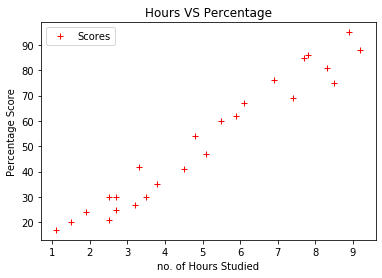

In [6]:
# plotting the distribution of scores
df.plot(x='Hours', y='Scores', color="red", style="+")  

plt.title('Hours VS Percentage')  
plt.xlabel('no. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

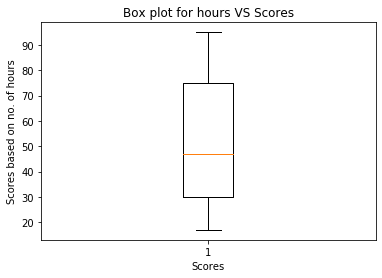

In [8]:
data_scores = df['Scores']
plt.boxplot(data_scores)
plt.title('Box plot for hours VS Scores')
plt.xlabel('Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

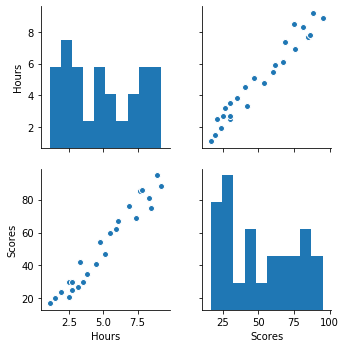

In [9]:
sns.pairplot(df)

## Initialization

In [11]:
# dividing the data into inputs and outputs
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Now that we have our attributes (inputs) and labels (outputs), the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
len(X_train)

20

In [14]:
len(X_test)

5

# Training the algorithm

We have split our data into training and testing sets, and now the time to train our algorithm.

In [15]:
from sklearn.linear_model import LinearRegression

# create a linear regression object using constructor
lr = LinearRegression()

# now fit the model
lr.fit(X_train, y_train)
print("Training the model.")

Training the model.


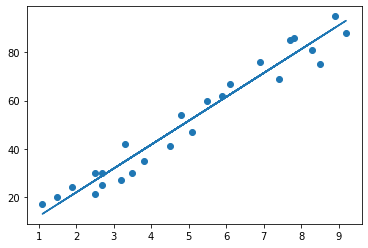

In [16]:
# Plotting the regression line
line = lr.coef_ * X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions

In [18]:
# Testing data - In Hours
print(X_test)

# Predicting the scores
Y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
print("Training Score:",lr.score(X_train,y_train))
print("Testing Score: ",lr.score(X_test,y_test))

Training Score: 0.9515510725211553
Testing Score:  0.9454906892105356


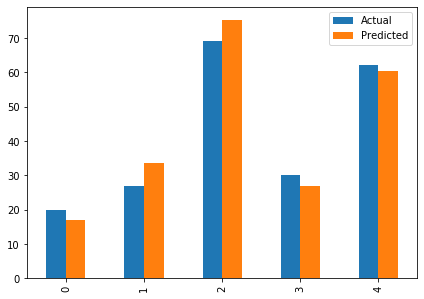

In [21]:
# plotting the actual and predicted value into bar graph
df1.plot(kind="bar", figsize=(7,5))
plt.show()

### Now we can test this with our own data

### If a student studies for 9.25 hours a day then his score is..

In [23]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
pred_val = lr.predict(test)
print("No. of hours= ", hours)
print("Predicted Score= ", pred_val[0])

No. of hours=  9.25
Predicted Score=  93.69173248737538


# Evaluating the model

In [26]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,Y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, Y_pred))
print("Root Mean Sqaured Error: ",np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))
print("Explained Variance Score: ",metrics.explained_variance_score(y_test,Y_pred))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Sqaured Error:  4.6474476121003665
Explained Variance Score:  0.9482829156738147


##### The above step of calculating error is to evaluate the performance of algorithm. And it is important as it tells how it differently perform on different dataset.
##### This is how we predicted the score of a student who studies for 9.25 hours a day